In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns


# feature selection imports
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE

# import scaling methods
from sklearn.preprocessing import RobustScaler, StandardScaler
from scipy import stats
from sklearn.model_selection import train_test_split

# import modeling methods
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score
from scipy import stats

# import to remove warnings
import warnings
warnings.filterwarnings("ignore")

import acquire as a

### Acquire


Acquire
Acquire the dataset from kaggle.com where each reservation represents rainfall in a day in Australia 

link to dataset: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv

In [2]:
## acquire our data from our local csv

df = pd.read_csv('weatherAUS.csv', index_col=0) ## reading our csv into a pandas dataframe

df.head() ## previewing our data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
## looking at our data shape 
df.shape

(145460, 22)

Looks like we have a good amount of observations let's look at some numerical statistics



In [4]:
## making a numerical statistics dataframe so we add a range by subtracting the min 
## from the max

stats = df.describe().T

stats['range'] = stats['max'] - stats['min'] 

stats ## displaying our numerical statistics

,count,mean,std,min,25%,50%,75%,max,range
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9,42.4
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1,52.9
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0,129.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0,100.0


In [5]:
## looking at our columns and their data types

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145460 entries, 2008-12-01 to 2017-06-25
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 

In [6]:
a.summarize_df(df) ## using our custom script function to look at data types and nulls

Info on Columns and Datatypes:

<class 'pandas.core.frame.DataFrame'>
Index: 145460 entries, 2008-12-01 to 2017-06-25
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   fl

Distribution of Location



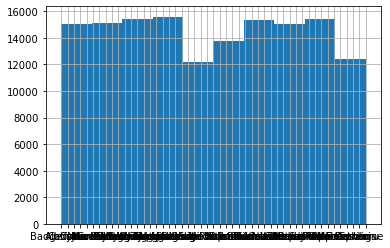

--------------------
Distribution of MinTemp



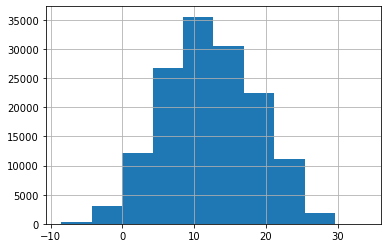

--------------------
Distribution of MaxTemp



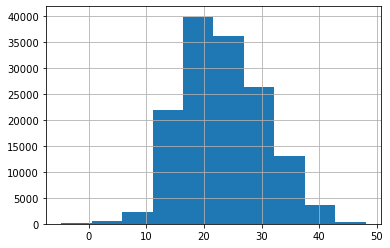

--------------------
Distribution of Rainfall



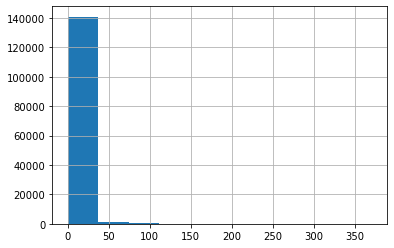

--------------------
Distribution of Sunshine



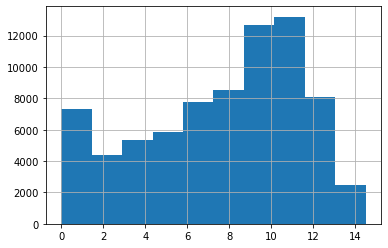

--------------------
Distribution of RainToday



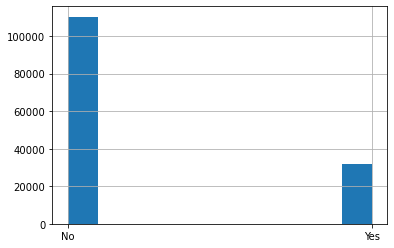

--------------------
Distribution of RainTomorrow



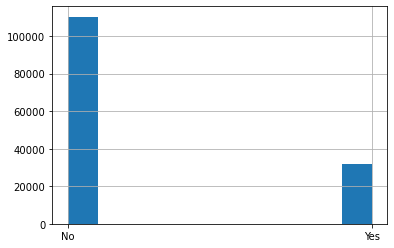

--------------------


In [7]:
## using our custom script funciton to look at distributions
a.univariate_distributions(df)

### Prepare

In [8]:
## we already checked for null values by doing the df.info() and we saw there
## were none so will now check for duplicate observations

df.duplicated().sum()

215

In [9]:
df = df.drop_duplicates() ## dropping duplicates

In [10]:
df.duplicated().sum() ## <-- quality assurance check

0

In [18]:
df.isnull().sum()

Location             0
MinTemp           1270
MaxTemp           1052
Rainfall          3089
Evaporation      62576
Sunshine         69621
WindGustDir      10111
WindGustSpeed    10048
WindDir9am       10351
WindDir3pm        4013
WindSpeed9am      1552
WindSpeed3pm      2847
Humidity9am       2439
Humidity3pm       4292
Pressure9am      14850
Pressure3pm      14813
Cloud9am         55673
Cloud3pm         59143
Temp9am           1552
Temp3pm           3394
RainToday         3089
RainTomorrow      3097
dtype: int64

In [19]:
## now we need to determine what to do with our null values

## let us start by looking at our data shape again

df.shape

(145245, 22)

Since some of the columns have about 50 percent null values we are going to remove those columns before removing null values that way it doesn't remove more than half of our observations.

In [20]:
df = df.drop(columns = ['Cloud3pm', 'Cloud9am', 'Sunshine', 'Evaporation'])

In [22]:
df.isnull().sum() ## checking nulls again2

Location             0
MinTemp           1270
MaxTemp           1052
Rainfall          3089
WindGustDir      10111
WindGustSpeed    10048
WindDir9am       10351
WindDir3pm        4013
WindSpeed9am      1552
WindSpeed3pm      2847
Humidity9am       2439
Humidity3pm       4292
Pressure9am      14850
Pressure3pm      14813
Temp9am           1552
Temp3pm           3394
RainToday         3089
RainTomorrow      3097
dtype: int64

In [25]:
df = df.dropna() ## dropping the other null because they are now 10 percent less than the amount of observations 

In [26]:
df.isnull().sum() ## quality assurance check

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [27]:
df.head() ##previewing dataframe to figure which columns are strings and need to be stripped

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [28]:
## stripping trailing and leading whitespace from string valued columns just in case

df.model = df.Location.str.strip()
df.fuelType = df.WindGustDir.str.strip()
df.transmission = df.WindDir9am.str.strip()
df.transmission = df.WindDir3pm.str.strip()
df.transmission = df.RainToday.str.strip()
df.transmission = df.RainTomorrow.str.strip()

In [29]:
df = df.reset_index() ## we also are going to reset the index so that the model information
## is a useable column

In [30]:
df.head() ## previewing the dataframe after prepare changes

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


### Prepare: Splitting Data

In [31]:
train_validate, test = train_test_split(df, test_size=.2, 
                                    random_state=123,
                                    stratify = df.RainTomorrow)
train, validate = train_test_split(train_validate, test_size=.3, 
                               random_state=123,
                               stratify= train_validate.RainTomorrow)

print('Making Sure Our Shapes Look Good')
print(f'Train: {train.shape}, Validate: {validate.shape}, Test: {test.shape}')
print('----------------------------\n')

print('Making Sure We Have Positive Cases In Each Split\n')

print('Train Target Value Counts:')
print(train.RainTomorrow.value_counts())
print('----------------------------\n')

print('Validate Target Value Counts:')
print(validate.RainTomorrow.value_counts())
print('----------------------------\n')

print('Test Target Value Counts:')
print(test.RainTomorrow.value_counts())
print('----------------------------\n')

Making Sure Our Shapes Look Good
Train: (63238, 19), Validate: (27102, 19), Test: (22585, 19)
----------------------------

Making Sure We Have Positive Cases In Each Split

Train Target Value Counts:
No     49227
Yes    14011
Name: RainTomorrow, dtype: int64
----------------------------

Validate Target Value Counts:
No     21098
Yes     6004
Name: RainTomorrow, dtype: int64
----------------------------

Test Target Value Counts:
No     17581
Yes     5004
Name: RainTomorrow, dtype: int64
----------------------------



In [32]:
train.head() ## previwing splits

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
101564,2012-02-02,Hobart,11.2,18.4,2.6,ESE,24.0,NW,ESE,7.0,13.0,80.0,53.0,1017.9,1015.0,14.0,17.6,Yes,No
83320,2014-12-03,Nuriootpa,18.3,32.7,0.0,WSW,52.0,NE,W,11.0,26.0,54.0,35.0,1008.4,1005.9,24.0,31.4,No,No
73337,2010-03-04,Townsville,25.4,32.3,11.4,WNW,26.0,W,N,7.0,13.0,72.0,59.0,1006.8,1004.4,30.2,31.9,Yes,No
29842,2014-09-17,Williamtown,12.5,23.1,0.2,WNW,48.0,WNW,WNW,24.0,28.0,44.0,23.0,1013.6,1010.1,18.3,22.6,No,No
70991,2011-07-24,GoldCoast,9.2,20.4,0.0,S,30.0,NW,SE,6.0,24.0,52.0,56.0,1018.6,1016.5,16.1,18.7,No,No


In [33]:
validate.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
106008,2012-03-16,AliceSprings,22.3,28.8,0.0,SE,54.0,SSE,SSE,24.0,26.0,48.0,41.0,1008.0,1005.4,22.8,27.6,No,No
94327,2016-03-20,PerthAirport,17.9,32.3,2.2,E,28.0,ENE,SW,17.0,11.0,62.0,38.0,1013.7,1010.2,23.7,31.3,Yes,No
18310,2017-04-10,NorfolkIsland,21.7,25.7,0.0,NE,46.0,ENE,NE,22.0,26.0,94.0,85.0,1016.0,1013.8,22.5,24.1,No,No
37911,2015-08-24,Tuggeranong,8.9,11.1,0.0,SSE,31.0,S,SSW,11.0,15.0,78.0,89.0,1020.7,1018.2,10.8,8.6,No,Yes
2290,2016-12-14,Albury,20.4,26.9,0.4,W,35.0,ENE,W,6.0,20.0,65.0,40.0,1008.2,1010.2,23.1,24.1,No,No


In [34]:
test.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
57807,2013-10-01,Portland,8.2,13.8,7.8,WSW,65.0,WSW,W,31.0,43.0,84.0,60.0,1003.4,1007.4,9.8,13.1,Yes,Yes
102084,2013-09-20,Hobart,10.9,17.8,0.4,S,50.0,NW,SW,17.0,20.0,54.0,41.0,1000.6,1002.1,12.9,15.9,No,No
103450,2009-01-10,Launceston,11.9,23.8,0.0,N,39.0,NW,N,7.0,22.0,69.0,48.0,1015.0,1011.2,16.3,21.9,No,No
85165,2011-12-04,Woomera,15.1,32.2,0.0,SSE,59.0,SE,SSW,30.0,17.0,41.0,13.0,1018.5,1014.4,20.3,30.3,No,No
61125,2015-03-03,Watsonia,13.9,24.0,0.0,SSW,30.0,SSE,SSW,6.0,15.0,69.0,50.0,1016.8,1015.5,18.4,23.6,No,No


## 